# Startup Assignment Description.
# Objective:
Analyze a dataset of 50 startups to understand the factors influencing profit and build a predictive model.
# Dataset:
Contains financial and geographical information about 50 startups.
# Features include:
Numerical: R&D Spend, Administration, Marketing Spend, Profit.
Categorical: State (New York, California, Florida).
# Tasks Performed:
Conduct exploratory data analysis (EDA) to understand feature distributions and relationships.
Visualize numerical feature distributions using histograms and KDE plots.
Compute and visualize correlations between features and the target variable (Profit).
Analyze categorical feature (State) impact on profit using bar plots.
Perform feature engineering by encoding the State column using one-hot encoding.
Build a Linear Regression model to predict startup profits.
Evaluate the model using metrics like Mean Squared Error (MSE) and R-squared (R²).
Interpret feature importance based on Linear Regression coefficients.
Key Deliverables :
Insights into the factors driving startup profits.
Recommendations for optimizing expenditures to maximize profitability.
A trained Linear Regression model capable of predicting profits based on input features.
# Tools and Libraries Used:
Python libraries: pandas, numpy, matplotlib, seaborn, scikit-learn.
Techniques: Data preprocessing, visualization, feature engineering, and machine learning.
# Expected Outcomes:
Identification of key drivers of profit (e.g., R&D Spend, Marketing Spend).
Insights into the impact of location (State) on profitability.
A predictive model with performance metrics (MSE, R²).
# Applications:
Help businesses allocate budgets effectively to maximize profitability.
Provide actionable insights for strategic decision-making.
# References:
Main Source => https://www.kaggle.com/datasets/farhanmd29/50-startups
Kaggle => https://www.kaggle.com/code/vishwaaradhyamath/
startups-eda-regression-ipynb
GitHub=> https://github.com/vmaradhya2020/DataVisualizationEDA/blob/main/Startups_EDA_Regression.ipynb


In [52]:
# Import necessary libraries
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Ignore all warnings
warnings.filterwarnings("ignore")
# Ignore specific warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", message="This is a specific warning to ignore")

In [53]:
# Load the dataset
df = pd.read_csv('/content/sample_data/50_Startups.csv')
# df = pd.read_csv('/kaggle/input/50-startups/50_Startups.csv'

# Display basic information about the dataset
print("Dataset Overview:")
print(df.info())
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Dispaly the unique states.
print("\nDisplay the unique states:")
print(df['State'].unique())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None

First 5 rows of the dataset:
   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

Display the unique states:
['New York' 'California' 'Flo

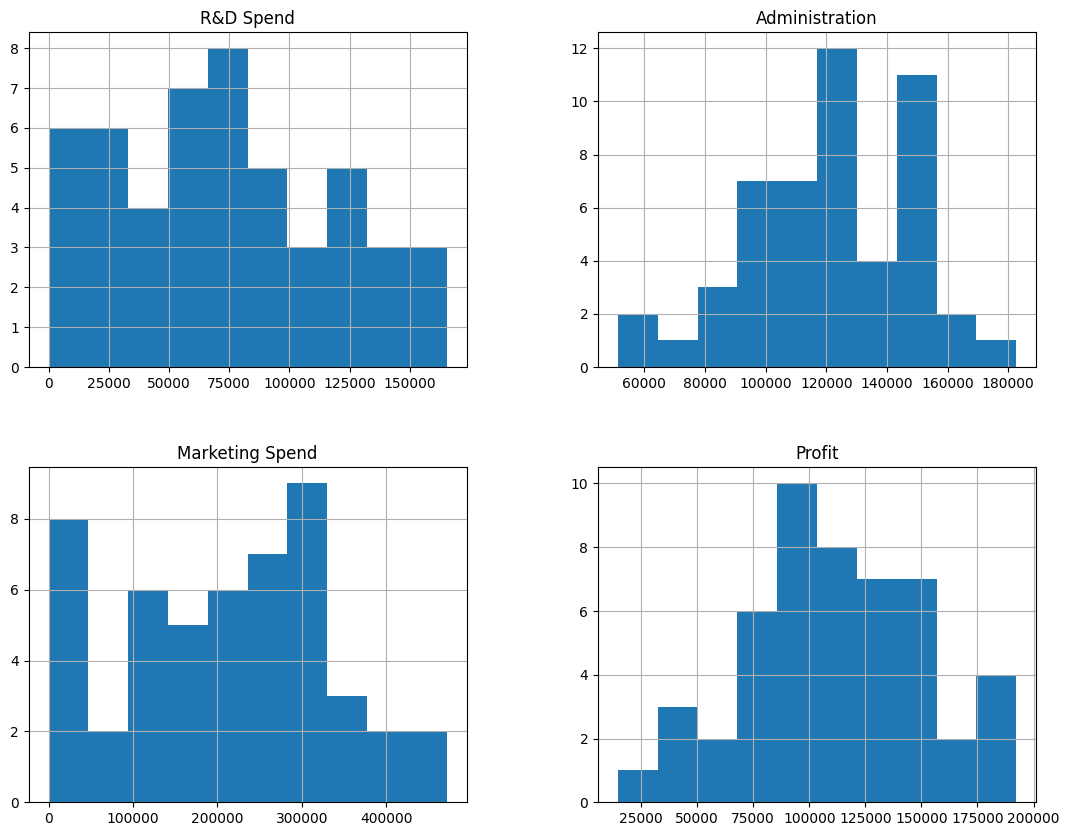

In [54]:
# Business Case 1: Understand the distribution of numerical features
# print("\nDistribution of Numerical Features:")
# for col in ['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']:
#     print(f"\n{col} Distribution:")
#     print(df[col].describe())
#     sns.histplot(df[col], kde=True, bins=30)
#     plt.title(f"Distribution of {col}")
#     plt.show()
df.hist(figsize=(13,10))
plt.show();


Correlation Matrix:


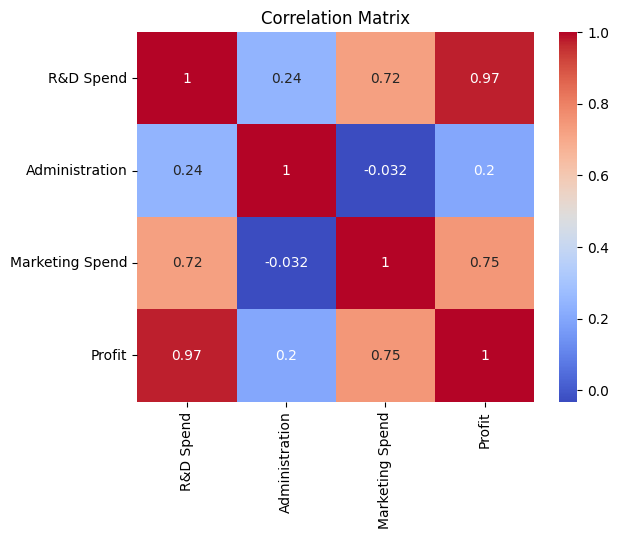

In [55]:
# Business Case 2: Analyze relationships between features and target variable (Profit)
print("\nCorrelation Matrix:")
# Select only numerical features for correlation analysis
numerical_features = ['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']
correlation_matrix = df[numerical_features].corr()  # Calculate correlation for numerical columns only
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

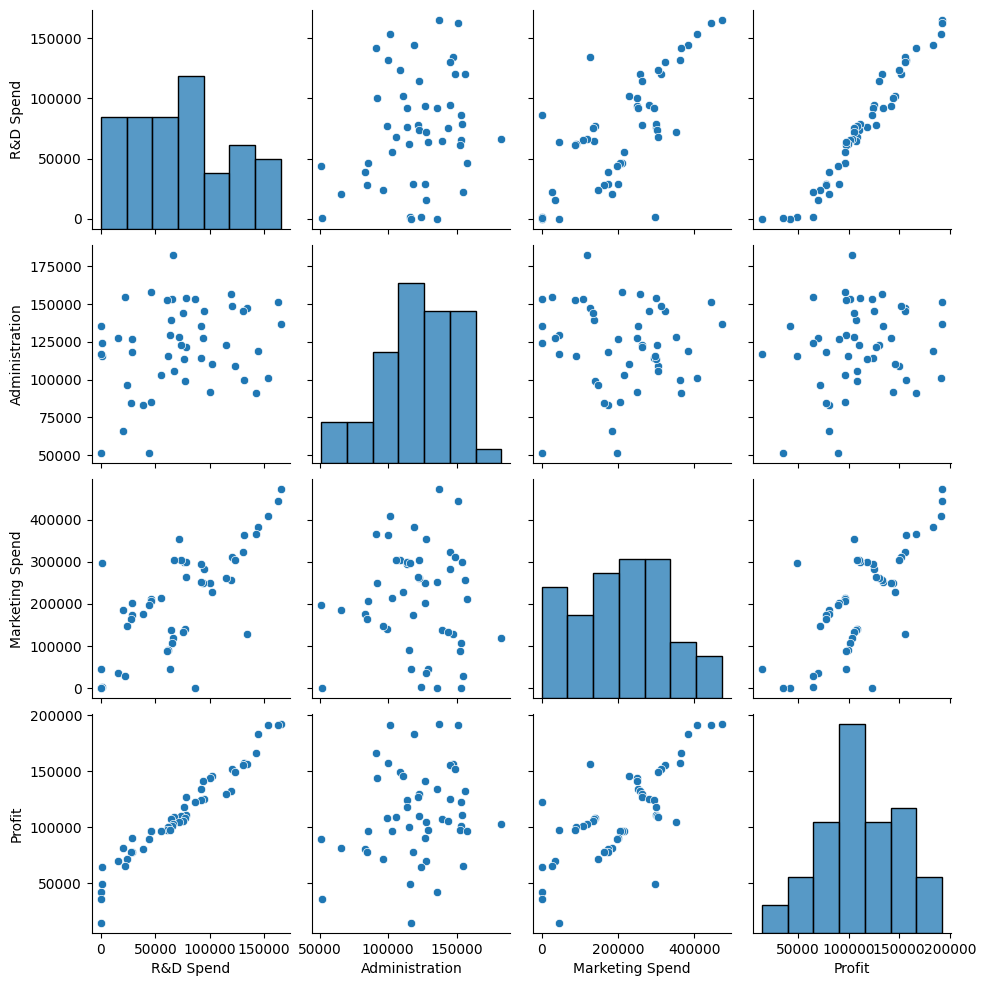

In [56]:
# Pairplot to visualize relationships
sns.pairplot(df)
plt.show()

In [57]:
# Business Case 3: Analyze categorical feature (State)
print("\nState-wise Profit Analysis:")
state_profit = df.groupby('State')['Profit'].mean().sort_values(ascending=False)
print(state_profit)


State-wise Profit Analysis:
State
Florida       118774.024375
New York      113756.446471
California    103905.175294
Name: Profit, dtype: float64


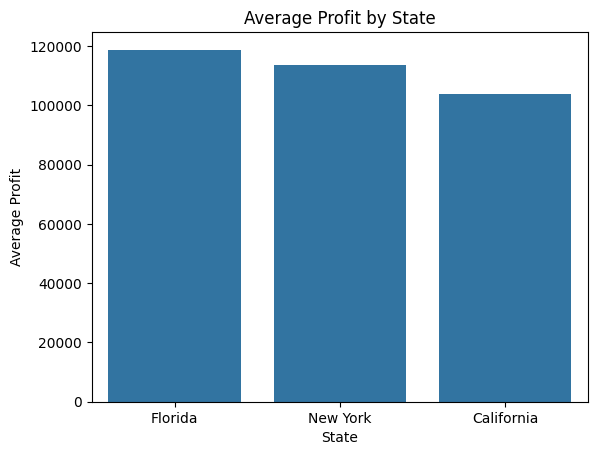

In [58]:
# Bar plot for state-wise profit
sns.barplot(x=state_profit.index, y=state_profit.values)
plt.title("Average Profit by State")
plt.xlabel("State")
plt.ylabel("Average Profit")
plt.show()

In [59]:
# Business Case 4: Feature Engineering - Encode categorical variable (State)
df_encoded = pd.get_dummies(df, columns=['State'], drop_first=True)  # One-hot encoding
print("\nEncoded Dataset:")
print(df_encoded.head())


Encoded Dataset:
   R&D Spend  Administration  Marketing Spend     Profit  State_Florida  \
0  165349.20       136897.80        471784.10  192261.83          False   
1  162597.70       151377.59        443898.53  191792.06          False   
2  153441.51       101145.55        407934.54  191050.39           True   
3  144372.41       118671.85        383199.62  182901.99          False   
4  142107.34        91391.77        366168.42  166187.94           True   

   State_New York  
0            True  
1           False  
2           False  
3            True  
4           False  


In [60]:
# Business Case 5: Build a Linear Regression Model
# Define features (X) and target (y)
X = df_encoded.drop(columns=['Profit'])
y = df_encoded['Profit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Model Evaluation:
Mean Squared Error (MSE): 82010363.04
R-squared (R2): 0.90


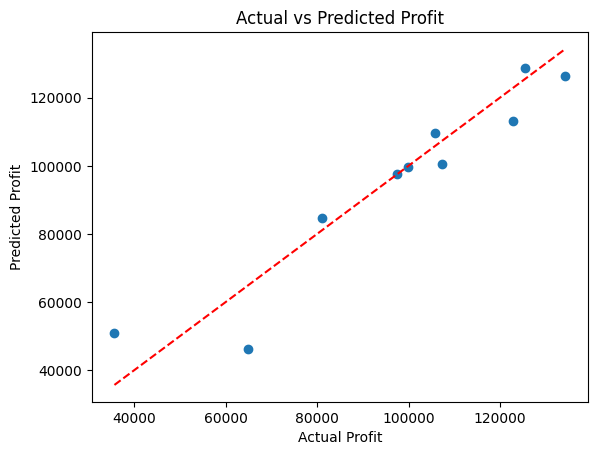

In [61]:
# Visualize actual vs predicted values
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.title("Actual vs Predicted Profit")
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.show()

In [62]:
# Business Case 6: Feature Importance
# Coefficients from the Linear Regression model
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\nFeature Importance:")
print(coefficients)


Feature Importance:
           Feature  Coefficient
3    State_Florida   938.793006
4   State_New York     6.987760
0        R&D Spend     0.805630
2  Marketing Spend     0.029855
1   Administration    -0.068788


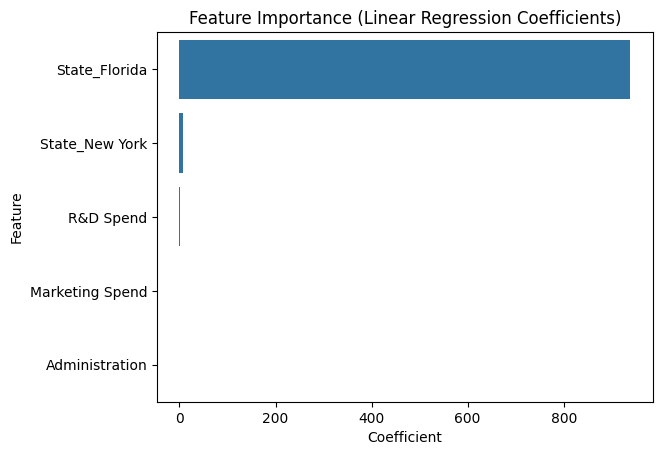

In [63]:
# Plot feature importance
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.show()

In [64]:
# Business Case 7: Insights and Recommendations
print("\nKey Insights and Recommendations:")
print("1. R&D Spend has the highest positive impact on Profit, followed by Marketing Spend.")
print("2. Administration spending has a relatively lower impact on Profit.")
print("3. Startups in California tend to generate higher profits compared to other states.")
print("4. Allocate more budget to R&D and Marketing to maximize profitability.")


Key Insights and Recommendations:
1. R&D Spend has the highest positive impact on Profit, followed by Marketing Spend.
2. Administration spending has a relatively lower impact on Profit.
3. Startups in California tend to generate higher profits compared to other states.
4. Allocate more budget to R&D and Marketing to maximize profitability.
